In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger
import matplotlib.pyplot as plt
import numpy as np

In [2]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [3]:
tf.version.VERSION

'2.4.1'

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [6]:
def build_model():
    input = layers.Input(shape=(28, 28, 1))
    print('Using Autoencoder Model')

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
    x = layers.MaxPooling2D((2, 2), padding="same")(x)
    x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
    x = layers.MaxPooling2D((2, 2), padding="same")(x)

    # Decoder
    x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

    # Autoencoder
    autoencoder = Model(input, x)
    autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
    autoencoder.summary()
    
    return autoencoder

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


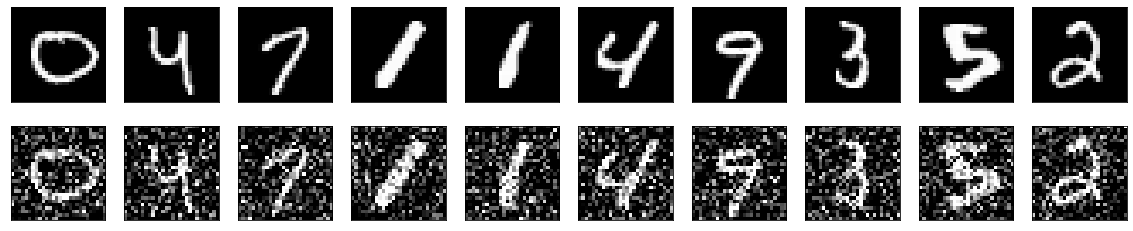

Using Autoencoder Model
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 2

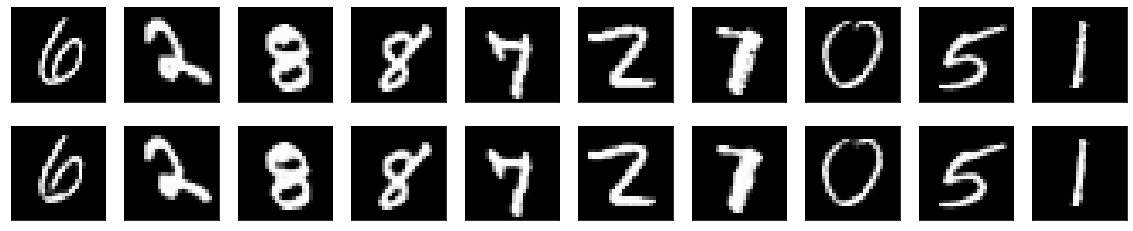

Training with Noisy data
Epoch 1/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0996 - val_loss: 0.0934
Epoch 2/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0929 - val_loss: 0.0915
Epoch 3/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0915 - val_loss: 0.0913
Epoch 4/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0906 - val_loss: 0.0897
Epoch 5/100
469/469 [==============================] - 5s 11ms/step - loss: 0.0899 - val_loss: 0.0891
Epoch 6/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0894 - val_loss: 0.0885
Epoch 7/100
469/469 [==============================] - 5s 11ms/step - loss: 0.0890 - val_loss: 0.0884
Epoch 8/100
469/469 [==============================] - 6s 12ms/step - loss: 0.0886 - val_loss: 0.0880
Epoch 9/100
469/469 [==============================] - 5s 11ms/step - loss: 0.0883 - val_loss: 0.0877
Epoch 10/100
469/469 [==============================] - 5s 

469/469 [==============================] - 3s 7ms/step - loss: 0.0847 - val_loss: 0.0845
Epoch 81/100
469/469 [==============================] - 5s 11ms/step - loss: 0.0847 - val_loss: 0.0846
Epoch 82/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0847 - val_loss: 0.0845
Epoch 83/100
469/469 [==============================] - 5s 11ms/step - loss: 0.0847 - val_loss: 0.0846
Epoch 84/100
469/469 [==============================] - 6s 12ms/step - loss: 0.0847 - val_loss: 0.0846
Epoch 85/100
469/469 [==============================] - 6s 12ms/step - loss: 0.0847 - val_loss: 0.0847
Epoch 86/100
469/469 [==============================] - 6s 14ms/step - loss: 0.0847 - val_loss: 0.0845
Epoch 87/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0847 - val_loss: 0.0845
Epoch 88/100
469/469 [==============================] - 5s 11ms/step - loss: 0.0847 - val_loss: 0.0846
Epoch 89/100
469/469 [==============================] - 5s 11ms/step - loss: 0.0847 - v

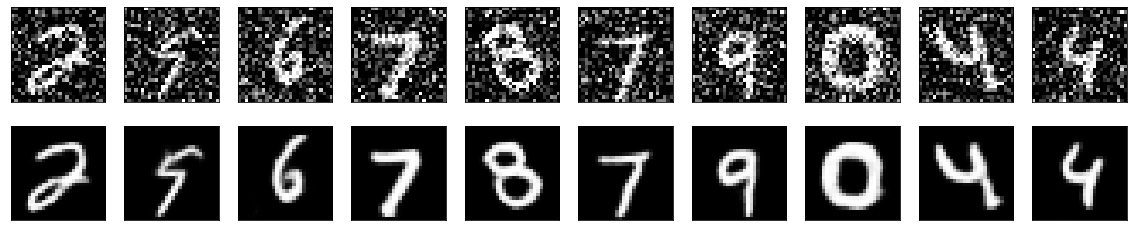

In [7]:
if __name__ == '__main__':
   
    # Split data between train and test sets
    # Check if MNIST dataset exists or not (download MNIST and save at path relative to ~/.keras/datasets).
    (x_train, _), (x_test, _) = keras.datasets.mnist.load_data(path="mnist.npz")

    # Normalize and reshape the data
    train_data = preprocess(x_train)
    test_data = preprocess(x_test)

    print("x_train shape:", x_train.shape)
    print("x_test shape:", x_test.shape)
    
    # Create a copy of the data with added noise
    noisy_train_data = noise(train_data)
    noisy_test_data = noise(test_data)
    
    # Display the train data and a version of it with added noise
    display(train_data, noisy_train_data)
    
    # Build model
    autoencoder = build_model()
    
    # Training with normal data
    print('Training with Normal data')
    autoencoder.fit(
        x=train_data,
        y=train_data,
        epochs=50,
        batch_size=128,
        shuffle=True,
        validation_data=(test_data, test_data),
    )    
    # Evaluate performance
    print('Evaluating with Normal data')
    predictions = autoencoder.predict(test_data)
    display(test_data, predictions)
    
    # Training with noisy data
    print('Training with Noisy data')
    autoencoder.fit(
        x=noisy_train_data,
        y=train_data,
        epochs=100,
        batch_size=128,
        shuffle=True,
        validation_data=(noisy_test_data, test_data),
    )    
    # Evaluate performance
    print('Evaluating with Noisy data')
    predictions = autoencoder.predict(noisy_test_data)
    display(noisy_test_data, predictions)